# CREDIT RISK ANALYSIS

In [2]:
import pandas as pd # data manipulation
import numpy as np # numerical calculations
import seaborn as sns # statistical visualization
import matplotlib.pyplot as plt # general plotting
print('Done')

Done


# loading data into dataframe

In [4]:
credit_risk_df = pd.read_excel(r"C:\Users\user\Desktop\credit_risk_dataset.xlsx") 

# Data Preview

In [6]:
credit_risk_df.head() # preview data

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,historical_default,credit_history_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [7]:
credit_risk_df.tail() # preview data

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,historical_default,credit_history_length
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26
32580,66,42000,RENT,2.0,MEDICAL,B,6475,9.99,0,0.15,N,30


In [8]:
credit_risk_df.shape # no of rows and columns

(32581, 12)

In [9]:
credit_risk_df.columns # column names

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'historical_default', 'credit_history_length'],
      dtype='object')

In [10]:
credit_risk_df.describe() # summary statistics

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,credit_history_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [11]:
credit_risk_df.info() # checks data types and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   person_age             32581 non-null  int64  
 1   person_income          32581 non-null  int64  
 2   person_home_ownership  32581 non-null  object 
 3   person_emp_length      31686 non-null  float64
 4   loan_intent            32581 non-null  object 
 5   loan_grade             32581 non-null  object 
 6   loan_amnt              32581 non-null  int64  
 7   loan_int_rate          29465 non-null  float64
 8   loan_status            32581 non-null  int64  
 9   loan_percent_income    32581 non-null  float64
 10  historical_default     32581 non-null  object 
 11  credit_history_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [12]:
credit_risk_df.isnull().sum() # number of missing values per column

person_age                  0
person_income               0
person_home_ownership       0
person_emp_length         895
loan_intent                 0
loan_grade                  0
loan_amnt                   0
loan_int_rate            3116
loan_status                 0
loan_percent_income         0
historical_default          0
credit_history_length       0
dtype: int64

In [13]:
credit_risk_df.duplicated().sum() # number of duplicated rows

165

In [14]:
credit_risk_df.nunique() # number of unique entries per column

person_age                 58
person_income            4295
person_home_ownership       4
person_emp_length          36
loan_intent                 6
loan_grade                  7
loan_amnt                 753
loan_int_rate             348
loan_status                 2
loan_percent_income        77
historical_default          2
credit_history_length      29
dtype: int64

# Data Cleaning

# 1. Handling Duplicates

In [17]:

duplicates = credit_risk_df[credit_risk_df.duplicated(keep=False)] # shows both occurences
duplicates

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,historical_default,credit_history_length
14,23,115000,RENT,2.0,EDUCATION,A,35000,7.90,0,0.30,N,4
238,22,183000,MORTGAGE,3.0,EDUCATION,A,1000,NaN,0,0.01,N,2
252,24,85000,RENT,5.0,MEDICAL,B,25000,10.62,0,0.29,N,4
591,26,20000,MORTGAGE,5.0,MEDICAL,A,4800,5.99,0,0.24,N,3
740,21,21600,OWN,NaN,VENTURE,A,7125,6.99,0,0.33,N,3
...,...,...,...,...,...,...,...,...,...,...,...,...
32010,42,39996,MORTGAGE,2.0,HOMEIMPROVEMENT,A,2500,5.42,0,0.06,N,12
32047,36,250000,RENT,2.0,DEBTCONSOLIDATION,A,20000,7.88,0,0.08,N,17
32172,49,120000,MORTGAGE,12.0,MEDICAL,B,12000,10.99,0,0.10,N,12
32259,39,40000,OWN,4.0,VENTURE,B,1000,10.37,0,0.03,N,16


In [18]:
credit_risk_df[credit_risk_df.duplicated(keep=False)].sort_values(by=credit_risk_df.columns.tolist()) # groupd matching rows together


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,historical_default,credit_history_length
15944,21,8088,RENT,NaN,MEDICAL,C,1200,15.23,0,0.15,Y,2
16835,21,8088,RENT,NaN,MEDICAL,C,1200,15.23,0,0.15,Y,2
2431,21,15600,RENT,0.0,MEDICAL,A,2800,7.40,1,0.18,N,4
17758,21,15600,RENT,0.0,MEDICAL,A,2800,7.40,1,0.18,N,4
2498,21,18000,RENT,0.0,DEBTCONSOLIDATION,A,3000,7.90,1,0.17,N,2
...,...,...,...,...,...,...,...,...,...,...,...,...
32010,42,39996,MORTGAGE,2.0,HOMEIMPROVEMENT,A,2500,5.42,0,0.06,N,12
29484,43,11340,RENT,4.0,EDUCATION,C,1950,NaN,1,0.17,N,11
32279,43,11340,RENT,4.0,EDUCATION,C,1950,NaN,1,0.17,N,11
31676,49,120000,MORTGAGE,12.0,MEDICAL,B,12000,10.99,0,0.10,N,12


In [19]:
credit_risk_df[credit_risk_df.duplicated(keep=False)] .sort_values(by=credit_risk_df.columns.tolist()) .to_csv("duplicates_review.csv", index=False) # exports to csv for better visiualization


In [20]:
credit_risk_df = credit_risk_df[~credit_risk_df.duplicated(keep='first')] # eliminating the second occurence of the duplicate
# drop.duplicates(credit_risk_df) straight away drops duplicates

In [21]:
credit_risk_df.duplicated().sum()

0

In [22]:
credit_risk_df.shape

(32416, 12)

# 2. Handling missing values

In [24]:
#filling in the interest rate missing values with mean
credit_risk_df['loan_int_rate'].fillna(credit_risk_df['loan_int_rate'].mean(), inplace=True)


C:\Users\user\AppData\Local\Temp\ipykernel_2252\4121805472.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  credit_risk_df['loan_int_rate'].fillna(credit_risk_df['loan_int_rate'].mean(), inplace=True)


In [25]:
credit_risk_df['person_emp_length'].fillna(credit_risk_df['person_emp_length'].mean(), inplace=True)


C:\Users\user\AppData\Local\Temp\ipykernel_2252\907150007.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  credit_risk_df['person_emp_length'].fillna(credit_risk_df['person_emp_length'].mean(), inplace=True)


In [26]:
credit_risk_df.isnull().sum()

person_age               0
person_income            0
person_home_ownership    0
person_emp_length        0
loan_intent              0
loan_grade               0
loan_amnt                0
loan_int_rate            0
loan_status              0
loan_percent_income      0
historical_default       0
credit_history_length    0
dtype: int64

# 3. Handling Data Types

In [28]:

credit_risk_df.dtypes # confirm correctness for all columns

person_age                 int64
person_income              int64
person_home_ownership     object
person_emp_length        float64
loan_intent               object
loan_grade                object
loan_amnt                  int64
loan_int_rate            float64
loan_status                int64
loan_percent_income      float64
historical_default        object
credit_history_length      int64
dtype: object

# 4. Handling Outliers

In [30]:
credit_risk_df[credit_risk_df['person_age'] > 100] # checking if i have any unrealistic values

# 144 and 123 are outliers, deleting them

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,historical_default,credit_history_length
81,144,250000,RENT,4.0,VENTURE,C,4800,13.570000,0,0.02,N,3
183,144,200000,MORTGAGE,4.0,EDUCATION,B,6000,11.860000,0,0.03,N,2
575,123,80004,RENT,2.0,EDUCATION,B,20400,10.250000,0,0.25,N,3
747,123,78000,RENT,7.0,VENTURE,B,20000,11.017265,0,0.26,N,4
32297,144,6000000,MORTGAGE,12.0,PERSONAL,C,5000,12.730000,0,0.00,N,25


In [31]:
# to solve, you can either remove or replace with median age, assuming it was an entry error
median_age = credit_risk_df['person_age'].median()
credit_risk_df.loc[credit_risk_df['person_age'] > 100, 'person_age'] = median_age
#credit_risk_df = credit_risk_df[credit_risk_df['person_age'] <= 100] #drops the outliers


In [32]:
mxage = credit_risk_df['person_age'].max()
mxage

94

# Exploratory Data Analysis

# what is the commonest intent for taking up loans

In [35]:
credit_risk_df['loan_intent'].value_counts()

loan_intent
EDUCATION            6411
MEDICAL              6042
VENTURE              5682
PERSONAL             5498
DEBTCONSOLIDATION    5189
HOMEIMPROVEMENT      3594
Name: count, dtype: int64

# Loan Amounts by Intent

In [37]:

credit_risk_df.groupby('loan_intent')['loan_amnt'].sum() # returns total loan amount for each loan inten

loan_intent
DEBTCONSOLIDATION    49841750
EDUCATION            60776600
HOMEIMPROVEMENT      37241475
MEDICAL              56018875
PERSONAL             52669100
VENTURE              54446300
Name: loan_amnt, dtype: int64

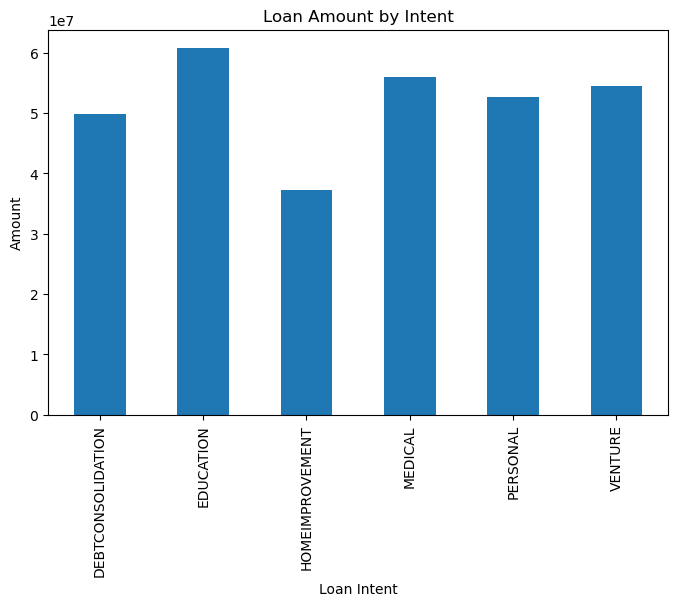

In [38]:
loan_amnt_sum = credit_risk_df.groupby('loan_intent')['loan_amnt'].sum()
loan_amnt_sum.plot(kind='bar', figsize=(8, 5))
plt.title('Loan Amount by Intent')
plt.xlabel('Loan Intent')
plt.ylabel('Amount')
#plt.legend(title='intent')  # Legend reflects the different metrics
plt.show()


# How level of Income affects Loan Amount

In [40]:
income_loan = credit_risk_df.groupby('loan_status').agg(
    AverageIncome = ('person_income', 'mean'),
    AverageLoanAmount = ('loan_amnt', 'mean')
)
income_loan 

,AverageIncome,AverageLoanAmount
loan_status,,
0,70849.122794,9240.155763
1,49094.497955,10857.479898


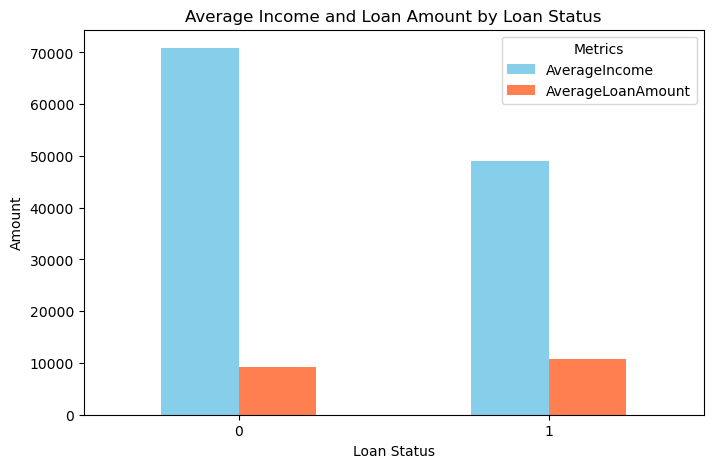

In [41]:
# Plot average income and loan amount by loan status
income_loan.plot(kind='bar', color=['skyblue', 'coral'], figsize=(8, 5))
plt.title('Average Income and Loan Amount by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Amount')
plt.xticks(rotation=0)
plt.legend(title='Metrics')  # Legend reflects the different metrics
plt.show()


# Risk of Default by Income Level

In [43]:
maxincome = credit_risk_df['person_income'].max()
maxincome

6000000

In [44]:
minincome = credit_risk_df['person_income'].min()
minincome

4000

In [45]:
credit_risk_df['income_category'] = credit_risk_df['person_income'].apply(
    lambda x: "Below 20000" if x < 20000 else ("20000-40000" if x <= 40000 else "40000 plus")
)
credit_risk_df['income_category']
credit_risk_df['income_category'].value_counts()

income_category
40000 plus     23193
20000-40000     8187
Below 20000     1036
Name: count, dtype: int64

In [46]:
defaultrisk_personincome = credit_risk_df.groupby('income_category')['loan_status'].mean()
defaultrisk_personincome
#from this breakdown it is evidennt that those earning under 20000 have an 81 percent chance of default while above 40000 have 15percent default risk

income_category
20000-40000    0.322707
40000 plus     0.155521
Below 20000    0.810811
Name: loan_status, dtype: float64

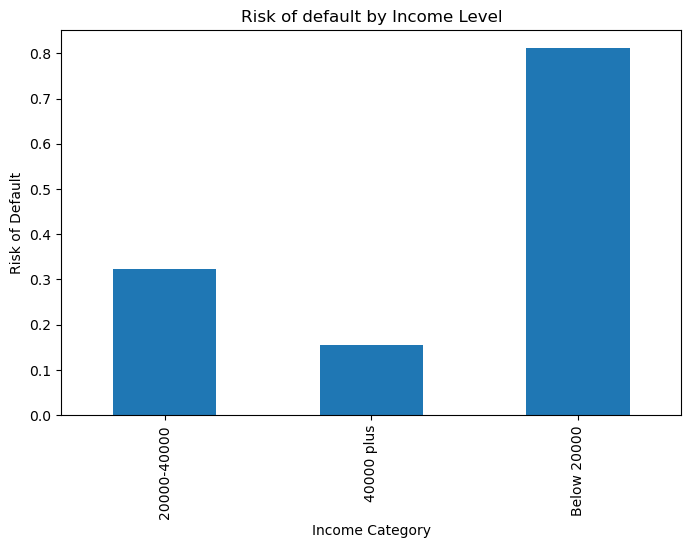

In [47]:
defaultrisk_personincome.plot(kind = 'bar', figsize = (8,5))
plt.title ('Risk of default by Income Level')
plt.xlabel('Income Category')
plt.ylabel('Risk of Default')
plt.show()

# defaulters vs non-defaulters statistics

In [49]:
credit_risk_df['loan_status'].value_counts()
#from this statistic, its evident the disparity that exist, with more people payng off their loans

loan_status
0    25327
1     7089
Name: count, dtype: int64

# Risk of default by loan intent 

In [51]:
defaultrisk_loanintent = credit_risk_df.groupby('loan_intent').agg(
    averageloanstatus = ('loan_status', 'mean')
)
defaultrisk_loanintent
#not a good measure, but those with debt consolidation intent have the highest default rate

,averageloanstatus
loan_intent,
DEBTCONSOLIDATION,0.286760
EDUCATION,0.172516
HOMEIMPROVEMENT,0.261547
MEDICAL,0.267627
PERSONAL,0.198981
VENTURE,0.148539


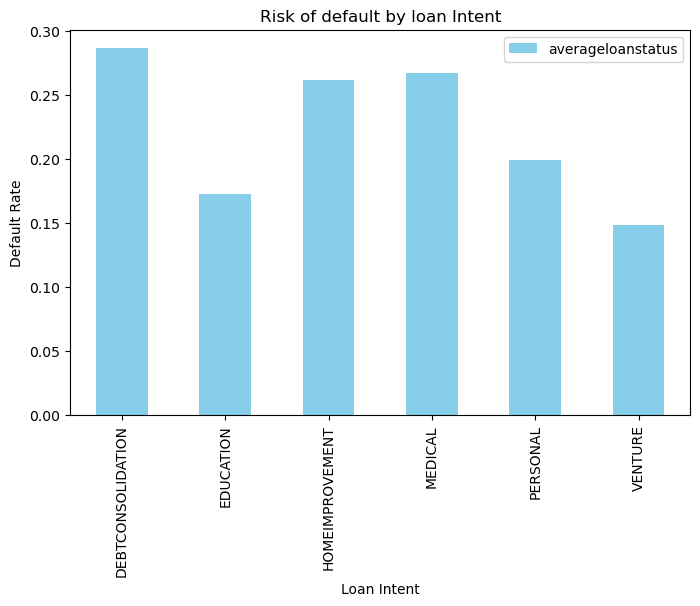

In [52]:

defaultrisk_loanintent.plot(kind='bar', color=['skyblue'], figsize=(8, 5))
plt.title('Risk of default by loan Intent')
plt.xlabel('Loan Intent')
plt.ylabel('Default Rate')
plt.show()


# How does debt history affect loan uptake

In [54]:
defaulthistory_loanuptake = credit_risk_df.groupby('historical_default').agg(
    AverageLoanAmount = ('loan_amnt', 'mean')
)
defaulthistory_loanuptake

,AverageLoanAmount
historical_default,
N,9478.584276
Y,10130.645724


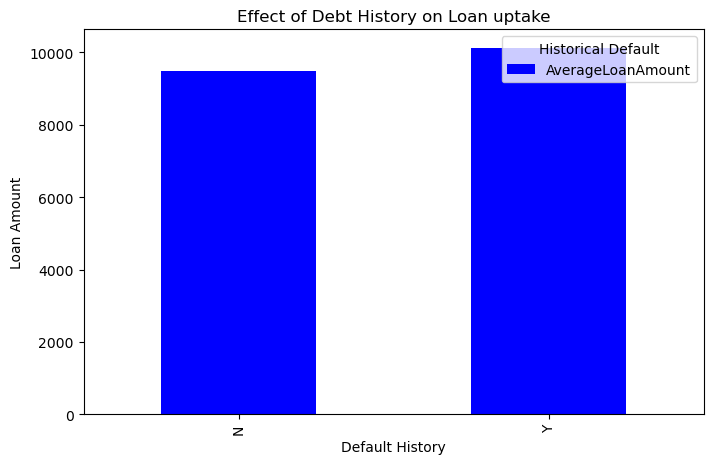

In [55]:
defaulthistory_loanuptake.plot(kind='bar', color=['blue'], figsize= (8, 5))
plt.title('Effect of Debt History on Loan uptake')
plt.xlabel('Default History')
plt.ylabel('Loan Amount')
plt.legend(title='Historical Default')
plt.show()

# Are historical defaulters likely to default again

In [57]:
credit_risk_df['historical_default'].value_counts()

historical_default
N    26686
Y     5730
Name: count, dtype: int64

In [58]:
historicaldefault_loanstatus = credit_risk_df.groupby('historical_default')['loan_status'].mean()
historicaldefault_loanstatus
#37 percent of those with historical default, defaulted compared to 18 percent of those with no historical default

historical_default
N    0.184329
Y    0.378709
Name: loan_status, dtype: float64

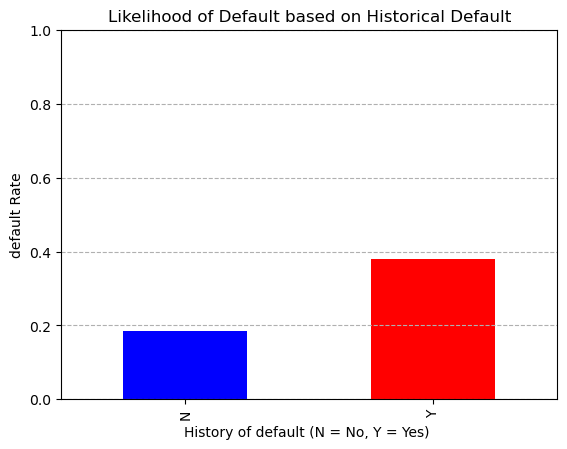

In [59]:
historicaldefault_loanstatus.plot(kind = 'bar' ,color = ['blue', 'red'])
plt.title('Likelihood of Default based on Historical Default')
plt.ylabel('default Rate')
plt.xlabel('History of default (N = No, Y = Yes) ')
plt.ylim(0, 1) # Default rate is btwn 0 and 1
plt.grid(axis = 'y', linestyle = '--')
plt.show()

# Risk of default by Home ownership

In [61]:
credit_risk_df['person_home_ownership'].value_counts()

person_home_ownership
RENT        16378
MORTGAGE    13369
OWN          2563
OTHER         106
Name: count, dtype: int64

In [62]:
# Convert "Default" to 1  and "Non-Default" to 0 
credit_risk_df['loan_status_numeric'] = credit_risk_df['loan_status'].map({'Default': 1, 'Non Default': 0})


homeownership_loanstatus = credit_risk_df.groupby('person_home_ownership')['loan_status_numeric'].mean()
homeownership_loanstatus

# output suggests people how rent are most likely to default, then mortgage holders, then home owners

person_home_ownership
MORTGAGE   NaN
OTHER      NaN
OWN        NaN
RENT       NaN
Name: loan_status_numeric, dtype: float64

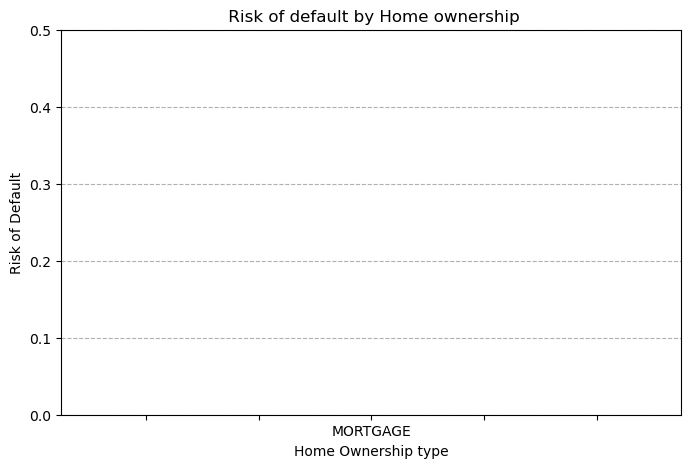

In [63]:
homeownership_loanstatus.plot(kind = 'line', color = ['coral'], figsize = (8,5))
plt.title(' Risk of default by Home ownership')
plt.ylabel('Risk of Default')
plt.xlabel('Home Ownership type')
plt.ylim(0,0.5)
plt.grid(axis = 'y', linestyle = '--')
plt.show()

#  how do credit history affect loan uptake

In [65]:
#define interest rates
#define credit history length
# Categorize credit history length using lambda function
credit_risk_df['credit_history_category'] = credit_risk_df['credit_history_length'].apply(
    lambda x: "Below 11 years" if x < 11 else ("Between 11-20 years" if x <= 20 else "Over 20 years")
)
credit_risk_df['credit_history_category']
# Display value counts to check distribution
credit_risk_df['credit_history_category'].value_counts()

credit_history_category
Below 11 years         28960
Between 11-20 years     3243
Over 20 years            213
Name: count, dtype: int64

In [66]:
loanamount_credithistorylength = credit_risk_df.groupby('credit_history_category').agg(
AverageLoanAmount = ('loan_amnt', 'mean')
)
loanamount_credithistorylength                                                                                               

,AverageLoanAmount
credit_history_category,
Below 11 years,9546.256043
Between 11-20 years,10005.180389
Over 20 years,9801.525822


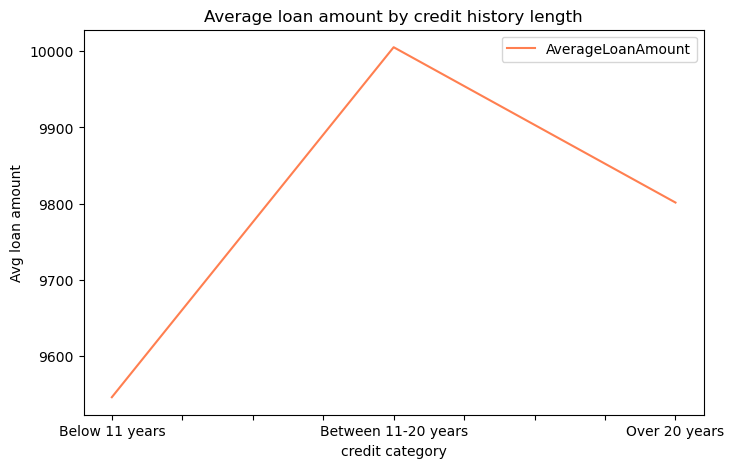

In [67]:
loanamount_credithistorylength.plot(kind ='line', color = ['coral'], figsize = (8, 5))
plt.title('Average loan amount by credit history length')
plt.xlabel('credit category')
plt.ylabel('Avg loan amount')
plt.show()

# Risk of Default by Credit History

In [69]:
defaultrisk_credithistory = credit_risk_df.groupby('credit_history_category').agg(
    averageloanstatus = ('loan_status', 'mean')
)
defaultrisk_credithistory

,averageloanstatus
credit_history_category,
Below 11 years,0.219751
Between 11-20 years,0.206599
Over 20 years,0.258216


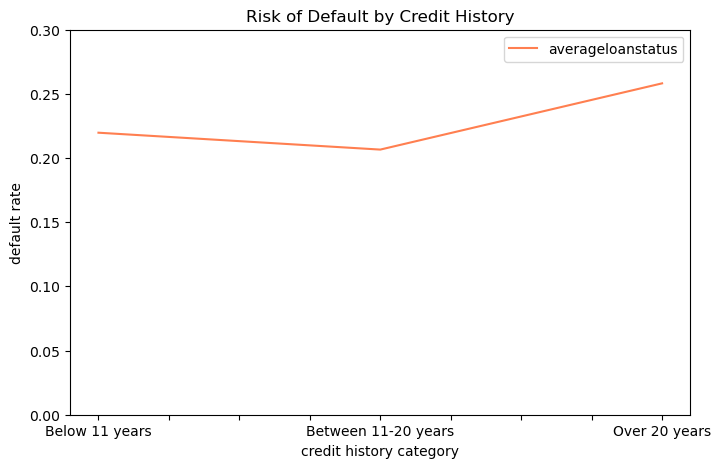

In [70]:
defaultrisk_credithistory.plot(kind ='line', color = ['coral'], figsize = (8, 5))
plt.title('Risk of Default by Credit History')
plt.xlabel('credit history category')
plt.ylabel('default rate')
plt.ylim(0, 0.3)
plt.show()

# how does employment length affect loan amount and default

In [72]:
max_value = credit_risk_df['person_emp_length'].max()
max_value

123.0

In [73]:
min_value = credit_risk_df['person_emp_length'].min()
min_value

0.0

In [74]:
# categrizing length of employee stay
credit_risk_df['employment_length_category'] = credit_risk_df['person_emp_length'].apply(
    lambda x: "Under 1year" if x < 12 else ("1-5 years" if x <= 60 else "Over 5 years")
)
credit_risk_df['employment_length_category'] 
credit_risk_df['employment_length_category'].value_counts()

employment_length_category
Under 1year     30233
1-5 years        2181
Over 5 years        2
Name: count, dtype: int64

In [75]:
employmentlenghth_loanamount = credit_risk_df.groupby('employment_length_category').agg(
    averageloanamount = ('loan_amnt', 'mean')
)
employmentlenghth_loanamount

,averageloanamount
employment_length_category,
1-5 years,11060.385144
Over 5 years,27500.000000
Under 1year,9486.865346


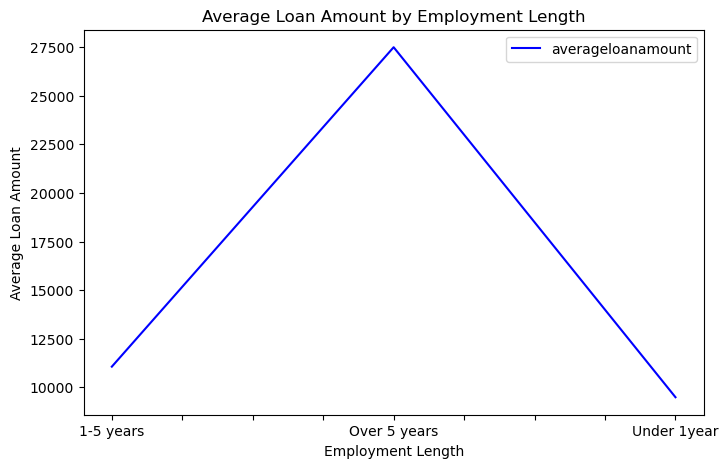

In [76]:
employmentlenghth_loanamount.plot  (kind = 'line', color = ['blue'], figsize = (8, 5))
plt.title('Average Loan Amount by Employment Length')
plt.ylabel('Average Loan Amount')
plt.xlabel('Employment Length')
plt.show()

# Default Risk by Employment Length


In [78]:
credit_risk_df['historical_default_numeric'] = credit_risk_df['historical_default'].map({'N': 0, 'Y': 1})
defaultrisk_employmentlength = credit_risk_df.groupby('employment_length_category')['historical_default_numeric'].mean()
defaultrisk_employmentlength

employment_length_category
1-5 years       0.152682
Over 5 years    0.500000
Under 1year     0.178480
Name: historical_default_numeric, dtype: float64

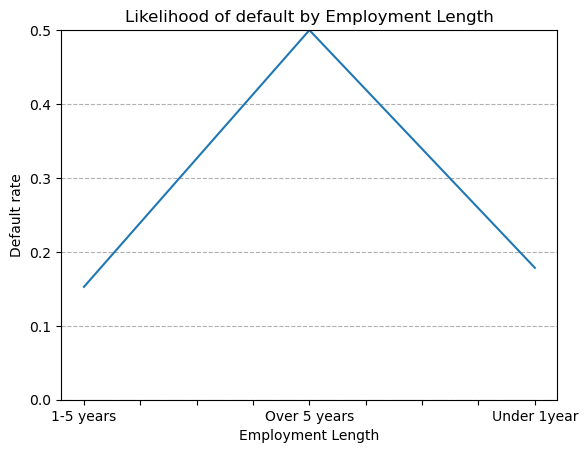

In [79]:
defaultrisk_employmentlength.plot(kind = 'line' )
plt.title('Likelihood of default by Employment Length')
plt.ylabel('Default rate')
plt.xlabel('Employment Length')
plt.ylim(0,0.5)
plt.grid(axis ='y', linestyle = '--' )
plt.show()

# Risk of default by interest rates

In [81]:
maxintrate = credit_risk_df['loan_int_rate'].max()
minintrate = credit_risk_df['loan_int_rate'].min()
maxintrate

23.22

In [82]:
minintrate

5.42

In [83]:
# categorizing interest rates into low, moderate, high
credit_risk_df['int_rate_category'] = credit_risk_df['loan_int_rate'].apply(
    lambda x: "5-12" if x < 13 else ("13-20" if x <= 20 else "21plus")
)
credit_risk_df['int_rate_category'].value_counts()


int_rate_category
5-12      24000
13-20      8342
21plus       74
Name: count, dtype: int64

In [84]:
#loanstatus_interestrate = credit_risk_df.groupby('int_rate_category')['loan_status'].mean()
#loanstatus_interestrate
# Convert "Yes" to 1 (Default) and "No" to 0 (Non-Default)
credit_risk_df['loan_status_numeric'] = credit_risk_df['loan_status'].map({'Default': 1, 'Non Default': 0})

# Compute the default rate per interest rate category
loanstatus_interestrate = credit_risk_df.groupby('int_rate_category')['loan_status_numeric'].mean()

# Display results
loanstatus_interestrate

#output suggests higher  default rates for loans withhigher interest rates

int_rate_category
13-20    NaN
21plus   NaN
5-12     NaN
Name: loan_status_numeric, dtype: float64

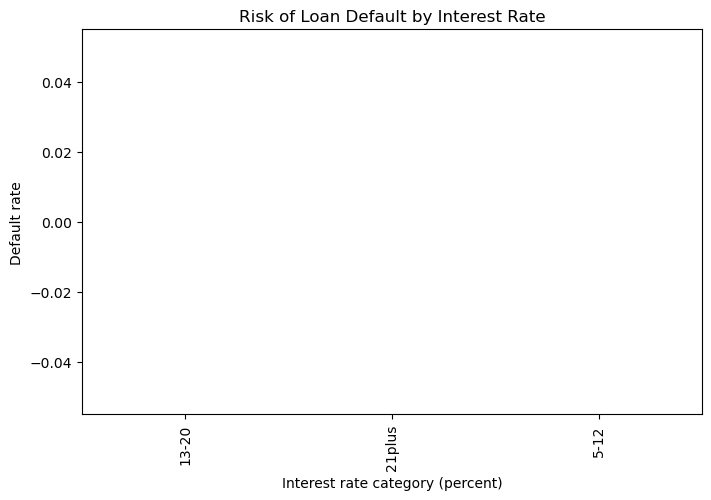

In [85]:
loanstatus_interestrate.plot(kind = 'bar', color = ['coral'], figsize = (8,5))
plt.title('Risk of Loan Default by Interest Rate')
plt.ylabel('Default rate')
plt.xlabel('Interest rate category (percent)')
plt.show()

# how does age affect loan amounts

In [87]:
# categorizing person_age
credit_risk_df['person_age_category'] = credit_risk_df['person_age'].apply(
    lambda x: "18-35 years" if x < 36 else ("36-54 years" if x <= 55 else "55plus")
    )
credit_risk_df['person_age_category'].value_counts()

person_age_category
18-35 years    28961
36-54 years     3321
55plus           134
Name: count, dtype: int64

In [88]:
minage = credit_risk_df['person_age'].min()
minage

20

In [89]:
maxage = credit_risk_df['person_age'].max()
maxage

94

In [90]:
personage_loanamount = credit_risk_df.groupby('person_age_category' ).agg(
    averageloanamount = ('loan_amnt', 'mean'),
    minloanamount = ('loan_amnt', 'min'),
    maxloanamount = ('loan_amnt', 'max')
 )
personage_loanamount

,averageloanamount,minloanamount,maxloanamount
person_age_category,,,
18-35 years,9546.099064,500,35000
36-54 years,9979.464017,1000,35000
55plus,10356.156716,1000,35000


In [91]:
#he above cod and this return same output, the above might be more relevant if i have multiple aggregates
personage_loanamount1 = credit_risk_df.groupby('person_age_category' )['loan_amnt'].mean()
personage_loanamount1


person_age_category
18-35 years     9546.099064
36-54 years     9979.464017
55plus         10356.156716
Name: loan_amnt, dtype: float64

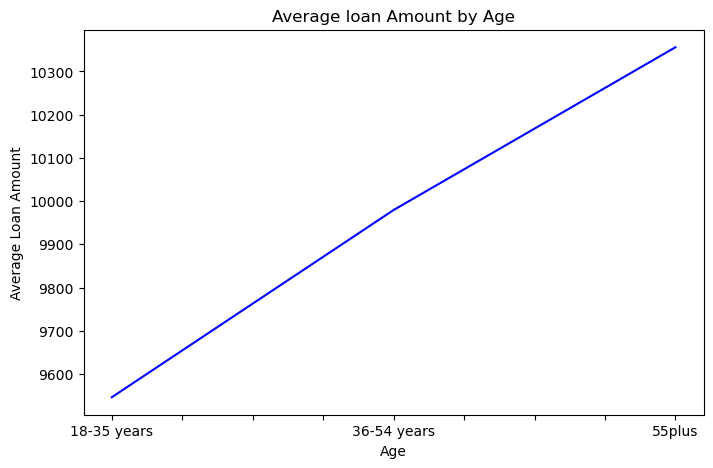

In [92]:
personage_loanamount1.plot(kind = 'line', color = ['blue'], figsize = (8, 5))
plt.title('Average loan Amount by Age')
plt.ylabel('Average Loan Amount')
plt.xlabel('Age')
plt.show( )

# Risk of Default by Age

In [94]:
defaultrisk_age = credit_risk_df.groupby('person_age_category')['loan_status'].mean()
defaultrisk_age

person_age_category
18-35 years    0.219744
36-54 years    0.208672
55plus         0.238806
Name: loan_status, dtype: float64

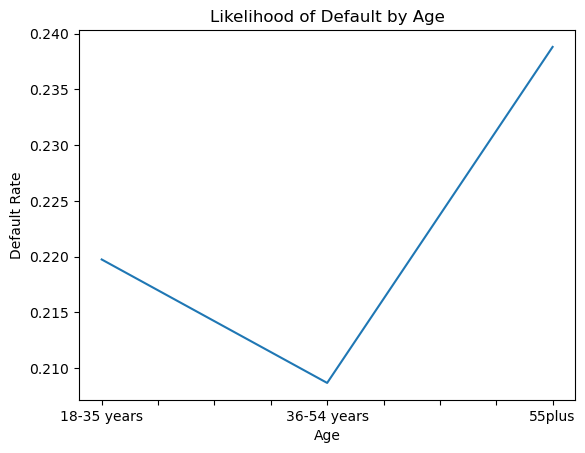

In [185]:
defaultrisk_age.plot()
plt.title('Likelihood of Default by Age')
plt.ylabel('Default Rate')
plt.xlabel('Age')
plt.show()
# from output, age is not a good scale for measuring risk of default


In [96]:
import os
os.getcwd()

'C:\\Users\\user'

In [183]:
import os
os.getcwd()


'C:\\Users\\user'